<a href="https://colab.research.google.com/github/tyletaey/personal-finance-dashboard-streamlit/blob/main/EDA_weplemoney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weple_2565-01-16.csv", encoding='utf-16')
df

,사용자,Date,수입/지출,Amount,Category,하위 분류,Text,Payment,Card,Memo
0,Default,2565-01-15,지출,120.0,Coffee,,kewl cafe,현금,,
1,Default,2565-01-15,지출,60.0,Food,,ไส้อั่ว,현금,,
2,Default,2565-01-15,지출,100.0,Beverage,,ถั่วปั่น,현금,,
3,Default,2565-01-14,지출,87.0,Food,,ก๋วยเตี๋ยวเรือ,현금,,
4,Default,2565-01-13,지출,65.0,Coffee,,Touch,현금,,
...,...,...,...,...,...,...,...,...,...,...
4599,Default,2561-02-02,지출,20.0,Food,,ผลไม้,현금,,
4600,Default,2561-02-02,지출,90.0,Clothing,,สกรีนผ้า,현금,,
4601,Default,2561-02-01,수입,3000.0,Salary,,Le light cafe’,현금,,
4602,Default,2561-02-01,지출,130.0,Food,,7-11,현금,,


In [ ]:
df.shape

(4604, 10)

In [ ]:
df.info() # ตรงชื่อคอลัมน์มันมีช่องว่างอยู่

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용자        4604 non-null   object 
 1    Date      4604 non-null   object 
 2    수입/지출     4604 non-null   object 
 3    Amount    4604 non-null   float64
 4    Category  4604 non-null   object 
 5    하위 분류     4604 non-null   object 
 6    Text      4604 non-null   object 
 7    Payment   4604 non-null   object 
 8    Card      4604 non-null   object 
 9    Memo      4604 non-null   object 
dtypes: float64(1), object(9)
memory usage: 359.8+ KB


In [ ]:
df.isnull().sum()

사용자          0
 Date        0
 수입/지출       0
 Amount      0
 Category    0
 하위 분류       0
 Text        0
 Payment     0
 Card        0
 Memo        0
dtype: int64

In [ ]:
# remove white space from columns name
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.columns

Index(['사용자', 'Date', '수입/지출', 'Amount', 'Category', '하위분류', 'Text', 'Payment',
       'Card', 'Memo'],
      dtype='object')

In [ ]:
# First step is to clean the data and see which are the redundant or unnecessary cols
# drop umwanted columns
col_list = ['사용자', '하위분류', 'Card', 'Memo', 'Payment', 'Text']
df = df.drop(col_list, axis=1)

df.head()

,Date,수입/지출,Amount,Category
0,2565-01-15,지출,120.0,Coffee
1,2565-01-15,지출,60.0,Food
2,2565-01-15,지출,100.0,Beverage
3,2565-01-14,지출,87.0,Food
4,2565-01-13,지출,65.0,Coffee


In [ ]:
# drop the duplicates from the dataset
print(df.shape)
df = df.drop_duplicates(keep='first')
print(df.shape)

(4604, 4)
(4493, 4)


In [ ]:
# drop income rows because we need only expense
df = df[df["수입/지출"].str.contains("수입") == False] # Dropping the rows that contain a specific string
print(df.shape)

(4478, 4)


In [ ]:
# Changing the Date column to DateTime column
df.Date = pd.to_datetime(df['Date'])

# we'll have to extract the year from every date


In [ ]:
#df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d'))

In [ ]:
# Check the date range in dataset
print('Min date :' + str(df['Date'].min()))
print('Max date :' + str(df['Date'].max())) # ปีในคอลัมน์ date เป็นพ.ศมันเลย error คิดว่านะ ต้องแปลงให้เป็น ค.ศ

Min date : 2561-02-01
Max date : 2565-01-15


In [ ]:
# Date column in this dataset has a Out of bounds nanosecond timestamp error
#display minimum timestamp allowed
print(pd.Timestamp.min)
#display maximum timestamp allowed
print(pd.Timestamp.max)

1677-09-21 00:12:43.145224193
2262-04-11 23:47:16.854775807


In [ ]:
# Creat new dataframe for manage date column
# new_date = df['Date'].copy()
# print("Original Dataframe:")
# print(new_date)
# new_date[["year", "month", "day"]] = new_date["Date"].str.split("-", expand = True)
# print("New DataFrame:")
# new_date

In [ ]:
# new_date['year'] = new_date['year'].astype(int)
# new_date['year'] = new_date['year'] - 543
# print(new_date['year'])

In [ ]:
# new_date

In [ ]:
# Creat new columns for manage date column
df[["year", "month", "day"]] = df["Date"].str.split("-", expand = True)
df

,Date,수입/지출,Amount,Category,year,month,day
0,2565-01-15,지출,120.0,Coffee,2565,01,15
1,2565-01-15,지출,60.0,Food,2565,01,15
2,2565-01-15,지출,100.0,Beverage,2565,01,15
3,2565-01-14,지출,87.0,Food,2565,01,14
4,2565-01-13,지출,65.0,Coffee,2565,01,13
...,...,...,...,...,...,...,...
4598,2561-02-02,지출,30.0,Food,2561,02,02
4599,2561-02-02,지출,20.0,Food,2561,02,02
4600,2561-02-02,지출,90.0,Clothing,2561,02,02
4602,2561-02-01,지출,130.0,Food,2561,02,01


In [ ]:
df['year'] = df['year'].astype(int)
df['year'] = df['year'] - 543
print(df['year'])

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4598    2018
4599    2018
4600    2018
4602    2018
4603    2018
Name: year, Length: 4478, dtype: int64


In [ ]:
df.head()

,Date,수입/지출,Amount,Category,year,month,day
0,2565-01-15,지출,120.0,Coffee,2022,01,15
1,2565-01-15,지출,60.0,Food,2022,01,15
2,2565-01-15,지출,100.0,Beverage,2022,01,15
3,2565-01-14,지출,87.0,Food,2022,01,14
4,2565-01-13,지출,65.0,Coffee,2022,01,13


In [ ]:
df['Date_new'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,Date,수입/지출,Amount,Category,year,month,day,Date_new
0,2565-01-15,지출,120.0,Coffee,2022,01,15,2022-01-15
1,2565-01-15,지출,60.0,Food,2022,01,15,2022-01-15
2,2565-01-15,지출,100.0,Beverage,2022,01,15,2022-01-15
3,2565-01-14,지출,87.0,Food,2022,01,14,2022-01-14
4,2565-01-13,지출,65.0,Coffee,2022,01,13,2022-01-13


In [ ]:
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 0 to 4603
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4478 non-null   object        
 1   수입/지출     4478 non-null   object        
 2   Amount    4478 non-null   float64       
 3   Category  4478 non-null   object        
 4   year      4478 non-null   int64         
 5   month     4478 non-null   int64         
 6   day       4478 non-null   int64         
 7   Date_new  4478 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 314.9+ KB


## Exploratory data analysis (EDA)

## Descriptive statistics of numerical variables

In [ ]:
df.describe()

,Amount,year,month,day
count,4478.000000,4478.000000,4478.000000,4478.000000
mean,72.081440,2019.127289,6.694730,15.113444
std,93.324095,0.982928,3.503267,8.638993
min,0.000000,2018.000000,1.000000,1.000000
25%,30.000000,2018.000000,4.000000,8.000000
50%,55.000000,2019.000000,7.000000,15.000000
75%,80.000000,2020.000000,10.000000,22.000000
max,2000.000000,2022.000000,12.000000,31.000000


## Category column

In [ ]:
df.Category.nunique()

20

In [ ]:
df.Category.unique()

array([' Coffee', ' Food', ' Beverage', ' Transportation', ' Medical',
       ' Cars', ' Other', ' Phone', ' Necessaries', ' Cultural Life',
       ' Fitness', ' Clothing', ' Beauty', ' Education', ' Utility Bill',
       ' Family Event', ' Electronics', ' Pet', ' Fee', ' Savings'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of spending by category')

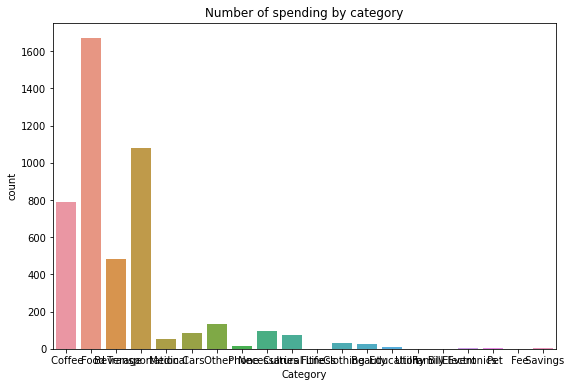

In [ ]:
plt.figure(figsize = (9, 6))
sns.countplot(df.Category)
plt.title("Number of spending by category")

In [ ]:
top10 = df[["Category", "Amount"]].groupby("Category", as_index = False).sum().sort_values(by = "Amount", ascending = False).reset_index().head(10)
top10

,index,Category,Amount
0,11,Food,112945.75
1,4,Coffee,60662.30
2,18,Transportation,50168.66
3,1,Beverage,25942.50
4,14,Other,15710.17
5,5,Cultural Life,13191.41
6,12,Medical,9761.00
7,13,Necessaries,8031.00
8,3,Clothing,7719.90
9,0,Beauty,7007.00


Text(0.5, 1.0, 'Top 10 spending by category')

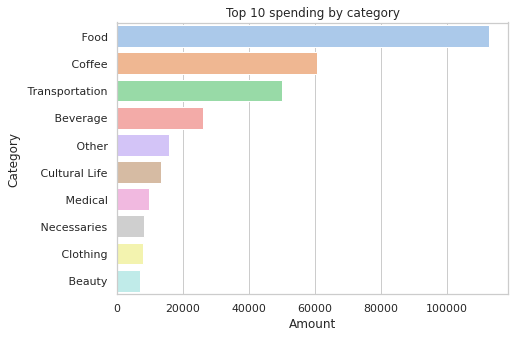

In [ ]:
sns.set_theme(style="whitegrid", palette='pastel')
plt.figure(figsize = (7, 5))
sns.barplot(x = 'Amount', y = 'Category', data = top10)
plt.title("Top 10 spending by category")

## Amount
Numirical column

In [ ]:
daily_amount = pd.DataFrame(df.groupby("Date_new").Amount.sum())
daily_amount

,Amount
Date_new,
2018-02-01,160.0
2018-02-02,2210.0
2018-02-03,210.0
2018-02-04,320.0
2018-02-05,20.0
...,...
2022-01-11,212.0
2022-01-12,476.0
2022-01-13,249.0


Text(0, 0.5, 'Transaction volume')

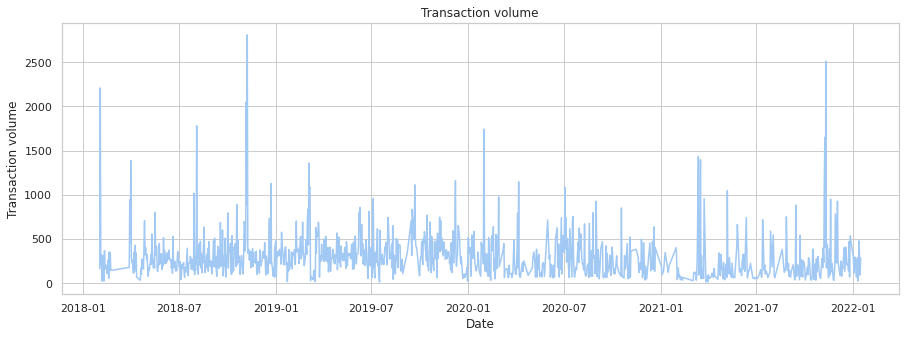

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(daily_amount.index, daily_amount.Amount)
plt.title("Transaction volume")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

In [ ]:
#month_amount = df.groupby(['month', 'Category'])['Amount'].sum().reset_index()
month_amount = pd.DataFrame(df.groupby("month").Amount.sum())
month_amount

,Amount
month,
1,23850.00
2,25187.00
3,22155.36
4,21753.00
5,26024.25
6,28497.00
7,28756.00
8,27834.00
9,24890.08


Text(0, 0.5, 'Amount')

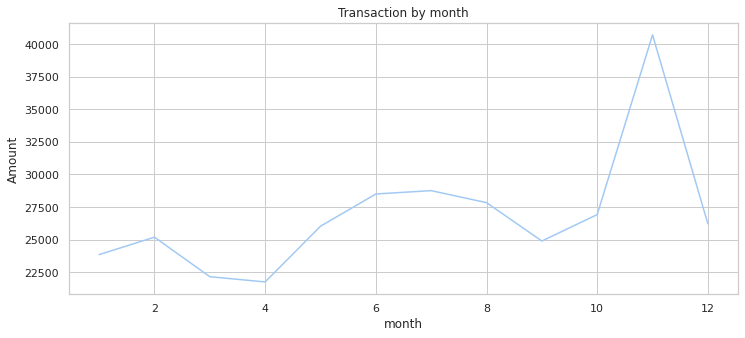

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(month_amount.index, month_amount.Amount)
plt.title("Transaction by month")
plt.xlabel("month")
plt.ylabel("Amount") # ในทุกปีจะจ่ายเดือน 11 เยอะที่สุด

In [ ]:
year_total = pd.DataFrame(df.groupby("year").Amount.sum())
year_total

,Amount
year,
2018,85996.00
2019,114196.52
2020,69743.00
2021,49602.17
2022,3243.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total')

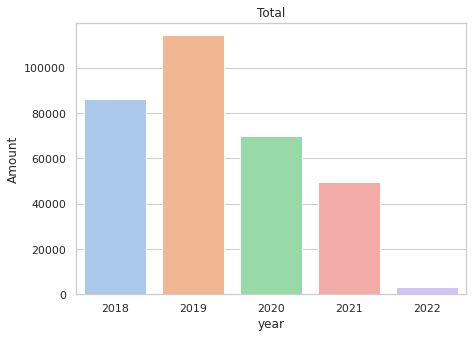

In [ ]:
plt.figure(figsize = (7, 5))
sns.barplot(year_total.index, year_total.Amount, data = year_total)
plt.title("Total")

## Export data to new csv file

In [ ]:
df.head()

,Date,수입/지출,Amount,Category,Text,year,month,day,Date_new
0,2565-01-15,지출,120.0,Coffee,kewl cafe,2022,1,15,2022-01-15
1,2565-01-15,지출,60.0,Food,ไส้อั่ว,2022,1,15,2022-01-15
2,2565-01-15,지출,100.0,Beverage,ถั่วปั่น,2022,1,15,2022-01-15
3,2565-01-14,지출,87.0,Food,ก๋วยเตี๋ยวเรือ,2022,1,14,2022-01-14
4,2565-01-13,지출,65.0,Coffee,Touch,2022,1,13,2022-01-13


In [ ]:
df.to_csv('my_finance.csv')

In [ ]:
sum_2018 = df[df['year'] == 2018].groupby('month_name').Amount.sum()
sum_2019 = df[df['year'] == 2019].groupby('month').Amount.sum()
sum_2020 = df[df['year'] == 2020].groupby('month').Amount.sum()
sum_2021 = df[df['year'] == 2021].groupby('month').Amount.sum()

In [ ]:
sum_2018

month_name
Apr     6857.0
Aug     8822.0
Dec     8882.0
Feb     5970.0
Jul     6518.0
Jun     7948.0
Mar     1566.0
May     8034.0
Nov    14185.0
Oct     9257.0
Sep     7957.0
Name: Amount, dtype: float64

In [ ]:
month_name = []
        
date_dict = { 
            1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 
            5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug',
            9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'
        }

for i in range(len(df)) : 
        month_name.append(date_dict[df.month.iloc[i]])

df['month_name'] = month_name

In [ ]:
df

,Date,수입/지출,Amount,Category,year,month,day,Date_new,month_name
0,2565-01-15,지출,120.0,Coffee,2022,1,15,2022-01-15,Jan
1,2565-01-15,지출,60.0,Food,2022,1,15,2022-01-15,Jan
2,2565-01-15,지출,100.0,Beverage,2022,1,15,2022-01-15,Jan
3,2565-01-14,지출,87.0,Food,2022,1,14,2022-01-14,Jan
4,2565-01-13,지출,65.0,Coffee,2022,1,13,2022-01-13,Jan
...,...,...,...,...,...,...,...,...,...
4598,2561-02-02,지출,30.0,Food,2018,2,2,2018-02-02,Feb
4599,2561-02-02,지출,20.0,Food,2018,2,2,2018-02-02,Feb
4600,2561-02-02,지출,90.0,Clothing,2018,2,2,2018-02-02,Feb
4602,2561-02-01,지출,130.0,Food,2018,2,1,2018-02-01,Feb


In [ ]:
monthly_spending = df.groupby(['month', 'Category'])['Amount'].sum().reset_index()
monthly_spending

,month,Category,Amount
0,1,Beauty,379.0
1,1,Beverage,3123.0
2,1,Cars,150.0
3,1,Coffee,4951.0
4,1,Cultural Life,364.0
...,...,...,...
152,12,Medical,523.0
153,12,Necessaries,785.0
154,12,Other,413.0
155,12,Phone,320.0


Text(0, 0.5, 'Amount')

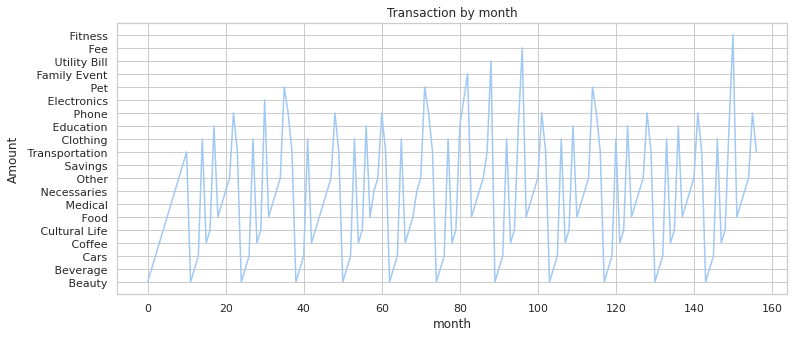

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(monthly_spending.index, monthly_spending.Category)
plt.title("Transaction by month")
plt.xlabel("month")
plt.ylabel("Amount")